In [40]:
import numpy as np
import pandas as pd
import joblib as jb
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv('smart_city_citizen_activity.csv')
df.head()

,Citizen_ID,Age,Gender,Mode_of_Transport,Work_Hours,Shopping_Hours,Entertainment_Hours,Home_Energy_Consumption_kWh,Charging_Station_Usage,Carbon_Footprint_kgCO2,Steps_Walked,Calories_Burned,Sleep_Hours,Social_Media_Hours,Public_Events_Hours
0,1001,56,Female,Walking,5,2,0,5.32,0,44.70,15635,975,9.2,5.8,0.5
1,1002,69,Male,Bicycle,0,2,2,2.19,0,92.39,1671,455,8.1,5.5,1.9
2,1003,46,Male,Bike,0,4,0,4.68,0,78.57,1777,324,4.7,3.8,2.8
3,1004,32,Male,Car,7,2,3,3.42,0,55.46,4022,537,4.9,3.5,0.5
4,1005,60,Male,Walking,3,3,1,2.79,0,98.95,19244,1414,6.6,2.2,0.5


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Citizen_ID                   1000 non-null   int64  
 1   Age                          1000 non-null   int64  
 2   Gender                       1000 non-null   object 
 3   Mode_of_Transport            1000 non-null   object 
 4   Work_Hours                   1000 non-null   int64  
 5   Shopping_Hours               1000 non-null   int64  
 6   Entertainment_Hours          1000 non-null   int64  
 7   Home_Energy_Consumption_kWh  1000 non-null   float64
 8   Charging_Station_Usage       1000 non-null   int64  
 9   Carbon_Footprint_kgCO2       1000 non-null   float64
 10  Steps_Walked                 1000 non-null   int64  
 11  Calories_Burned              1000 non-null   int64  
 12  Sleep_Hours                  1000 non-null   float64
 13  Social_Media_Hours 

In [43]:
df = pd.DataFrame(df)
df.head()
column_list = list(df.columns)
column_list

['Citizen_ID',
 'Age',
 'Gender',
 'Mode_of_Transport',
 'Work_Hours',
 'Shopping_Hours',
 'Entertainment_Hours',
 'Home_Energy_Consumption_kWh',
 'Charging_Station_Usage',
 'Carbon_Footprint_kgCO2',
 'Steps_Walked',
 'Calories_Burned',
 'Sleep_Hours',
 'Social_Media_Hours',
 'Public_Events_Hours']

In [44]:
#checking for NA values
df.isna().sum()

Citizen_ID                     0
Age                            0
Gender                         0
Mode_of_Transport              0
Work_Hours                     0
Shopping_Hours                 0
Entertainment_Hours            0
Home_Energy_Consumption_kWh    0
Charging_Station_Usage         0
Carbon_Footprint_kgCO2         0
Steps_Walked                   0
Calories_Burned                0
Sleep_Hours                    0
Social_Media_Hours             0
Public_Events_Hours            0
dtype: int64

In [45]:
df.duplicated('Citizen_ID').sum()

0

In [46]:
df.describe()

,Citizen_ID,Age,Work_Hours,Shopping_Hours,Entertainment_Hours,Home_Energy_Consumption_kWh,Charging_Station_Usage,Carbon_Footprint_kgCO2,Steps_Walked,Calories_Burned,Sleep_Hours,Social_Media_Hours,Public_Events_Hours
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,1500.500000,43.81900,4.397000,2.024000,1.532000,5.996900,0.29400,54.416840,10514.961000,818.61300,6.987000,3.007500,1.503600
std,288.819436,14.99103,2.870127,1.421071,1.102811,2.302009,0.45582,26.062576,5588.931531,302.49261,1.710923,1.706249,0.874226
min,1001.000000,18.00000,0.000000,0.000000,0.000000,2.000000,0.00000,10.020000,1011.000000,171.00000,4.000000,0.000000,0.000000
25%,1250.750000,31.00000,2.000000,1.000000,1.000000,4.050000,0.00000,31.717500,5679.500000,581.00000,5.500000,1.600000,0.800000
50%,1500.500000,44.00000,4.000000,2.000000,2.000000,5.870000,0.00000,53.665000,10448.500000,805.00000,7.000000,3.000000,1.500000
75%,1750.250000,56.00000,7.000000,3.000000,2.250000,8.010000,1.00000,77.865000,15377.500000,1070.00000,8.400000,4.400000,2.300000
max,2000.000000,69.00000,9.000000,4.000000,3.000000,9.990000,1.00000,99.930000,19972.000000,1447.00000,10.000000,6.000000,3.000000


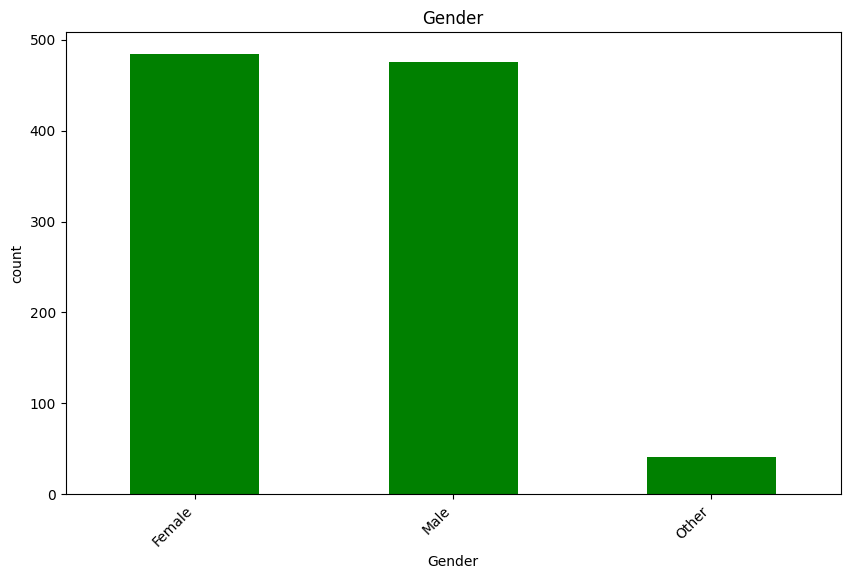

In [47]:
#Data Visualization
item_counts = df['Gender'].value_counts()

plt.figure(figsize = (10,6))
item_counts.plot(kind = 'bar',color = 'green')
plt.title('Gender')
plt.ylabel('count')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Mode_of_Transport"] = le.fit_transform(df["Mode_of_Transport"])
df.head()

,Citizen_ID,Age,Gender,Mode_of_Transport,Work_Hours,Shopping_Hours,Entertainment_Hours,Home_Energy_Consumption_kWh,Charging_Station_Usage,Carbon_Footprint_kgCO2,Steps_Walked,Calories_Burned,Sleep_Hours,Social_Media_Hours,Public_Events_Hours
0,1001,56,0,5,5,2,0,5.32,0,44.70,15635,975,9.2,5.8,0.5
1,1002,69,1,0,0,2,2,2.19,0,92.39,1671,455,8.1,5.5,1.9
2,1003,46,1,1,0,4,0,4.68,0,78.57,1777,324,4.7,3.8,2.8
3,1004,32,1,2,7,2,3,3.42,0,55.46,4022,537,4.9,3.5,0.5
4,1005,60,1,5,3,3,1,2.79,0,98.95,19244,1414,6.6,2.2,0.5


In [50]:
df.columns

Index(['Citizen_ID', 'Age', 'Gender', 'Mode_of_Transport', 'Work_Hours',
       'Shopping_Hours', 'Entertainment_Hours', 'Home_Energy_Consumption_kWh',
       'Charging_Station_Usage', 'Carbon_Footprint_kgCO2', 'Steps_Walked',
       'Calories_Burned', 'Sleep_Hours', 'Social_Media_Hours',
       'Public_Events_Hours'],
      dtype='object')

In [51]:
y=df.Carbon_Footprint_kgCO2
features=['Age', 'Gender', 'Mode_of_Transport', 'Work_Hours', 'Shopping_Hours',
       'Entertainment_Hours', 'Home_Energy_Consumption_kWh',
       'Charging_Station_Usage', 'Steps_Walked',
       'Calories_Burned', 'Sleep_Hours', 'Social_Media_Hours',
       'Public_Events_Hours']
x=df[features]

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size=0.2, random_state=78)

In [53]:
from tensorflow import keras
from tensorflow.keras import layers

In [54]:
model = keras.Sequential([
    layers.Input(shape=(13,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'), 
    layers.Dense(16, activation='relu'),
    layers.Dense(1),
])

In [55]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
)

In [56]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [57]:
model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test), callbacks=[early_stopping],)

Epoch 1/100
80/80 [==============================] - 2s 6ms/step - loss: 5278.3535 - val_loss: 3082.7273
Epoch 2/100
80/80 [==============================] - 0s 3ms/step - loss: 1319.2594 - val_loss: 1440.2100
Epoch 3/100
80/80 [==============================] - 0s 3ms/step - loss: 1809.7963 - val_loss: 3918.8027
Epoch 4/100
80/80 [==============================] - 0s 3ms/step - loss: 1788.0995 - val_loss: 897.9019
Epoch 5/100
80/80 [==============================] - 0s 3ms/step - loss: 1135.6168 - val_loss: 1155.7065
Epoch 6/100
80/80 [==============================] - 0s 3ms/step - loss: 1168.8862 - val_loss: 1238.1091
Epoch 7/100
80/80 [==============================] - 0s 3ms/step - loss: 1259.7384 - val_loss: 2620.2346
Epoch 8/100
80/80 [==============================] - 0s 3ms/step - loss: 1693.0554 - val_loss: 2454.7991
Epoch 9/100
80/80 [==============================] - 0s 3ms/step - loss: 1199.1692 - val_loss: 729.3506
Epoch 10/100
80/80 [==============================] - 0s 

In [58]:
new_data = pd.DataFrame({
    'Age': [52], 
    'Gender': [1], 
    'Mode_of_Transport': [2], 
    'Work_Hours': [0],
    'Shopping_Hours': [2],
    'Entertainment_Hours': [12],
    'Home_Energy_Consumption_kWh': [9],
    'Charging_Station_Usage': [2],
    'Steps_Walked': [12],
    'Calories_Burned': [1250],
    'Sleep_Hours': [8],
    'Social_Media_Hours': [3],
    'Public_Events_Hours': [0]
})

predictions = model.predict(new_data)
print(f"Predicted Carbon Footprint: {predictions[0][0]}")

1/1 [==============================] - 0s 113ms/step
Predicted Carbon Footprint: 24.14027214050293


In [76]:
import tensorflow as tf

model.save("carbon_footprint_model.h5")